### Question 1

First 25 values of Van der Corput sequence in base 2: [0.5, 0.25, 0.75, 0.125, 0.625, 0.375, 0.875, 0.0625, 0.5625, 0.3125, 0.8125, 0.1875, 0.6875, 0.4375, 0.9375, 0.03125, 0.53125, 0.28125, 0.78125, 0.15625, 0.65625, 0.40625, 0.90625, 0.09375, 0.59375]


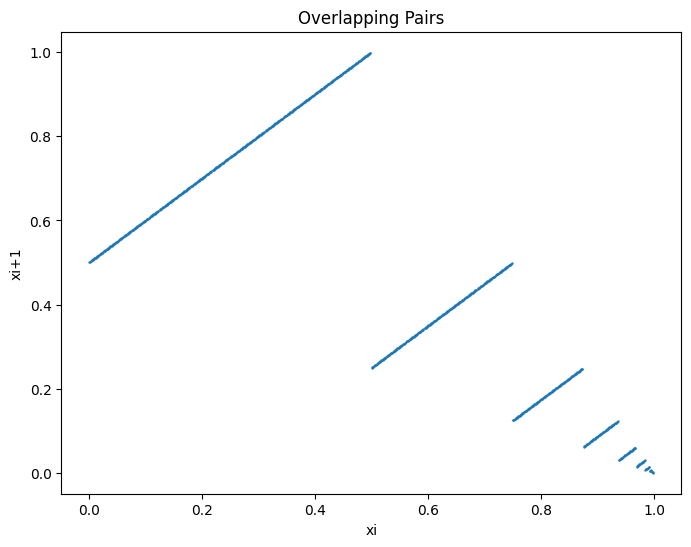

In [2]:
vdc_sequence_25 = []
for i in range(1, 26):
    x, f = 0, 1
    num = i
    while num > 0:
        f = f / 2
        x = x + f * (num % 2)
        num = num // 2
    vdc_sequence_25.append(x)
print("First 25 values of Van der Corput sequence in base 2:", vdc_sequence_25)

vdc_sequence_1000 = []
for i in range(1, 1001):
    x, f = 0, 1
    num = i
    while num > 0:
        f = f / 2
        x = x + f * (num % 2)
        num = num // 2
    vdc_sequence_1000.append(x)

pairs = [(vdc_sequence_1000[i], vdc_sequence_1000[i+1]) for i in range(len(vdc_sequence_1000)-1)]

# Plot overlapping pairs
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*pairs), s=0.5)
plt.title("Overlapping Pairs")
plt.xlabel("xi")
plt.ylabel("xi+1")
plt.show()


#### The first 25 values cover the interval [0,1] fairly evenly.
#### The sequence avoids clustering.

### Question 2

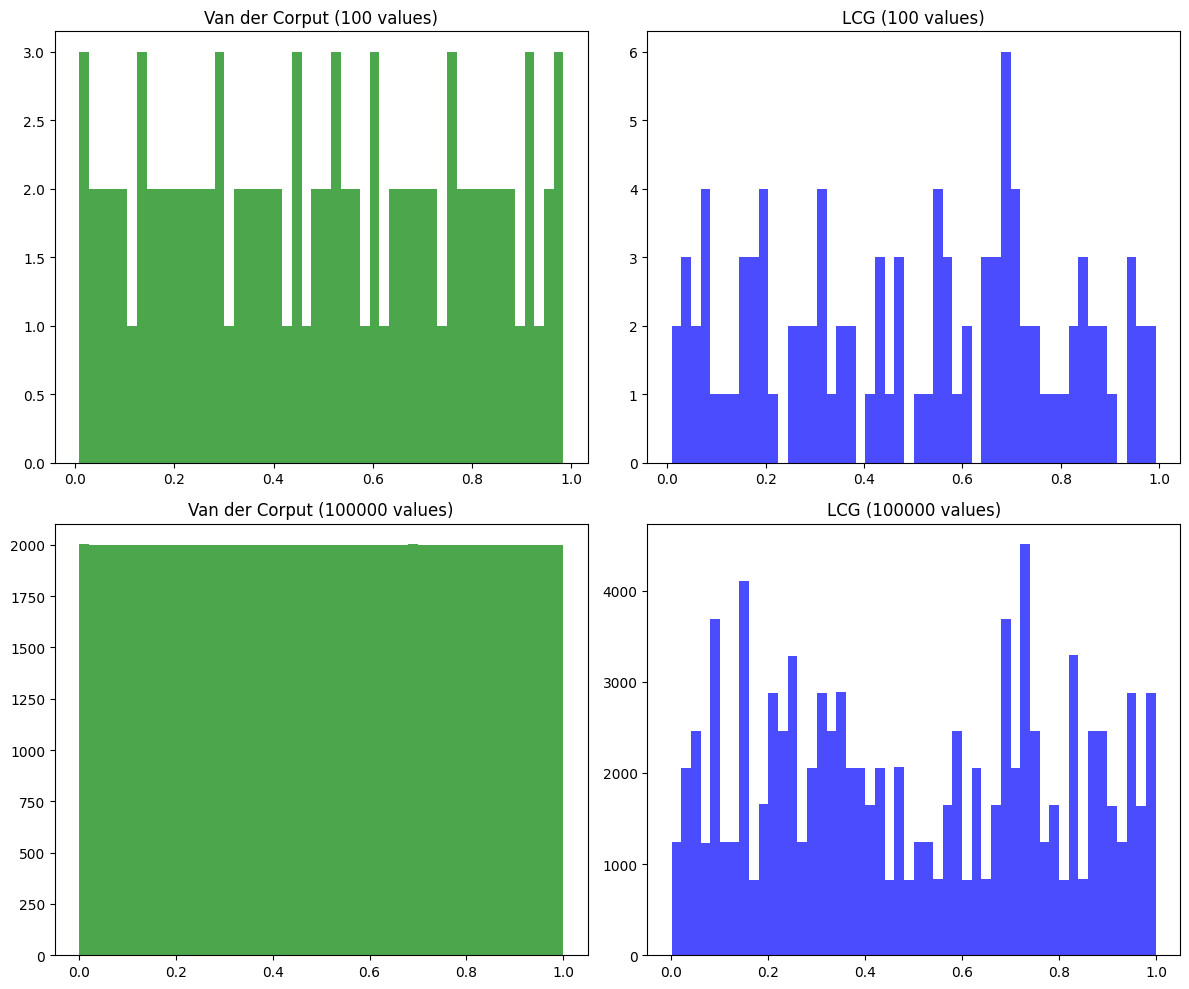

In [7]:
import numpy as np

vdc_sequence_100 = []
vdc_sequence_100000 = []
for i in range(1, 100001):
    x, f = 0, 1
    num = i
    while num > 0:
        f = f / 2
        x = x + f * (num % 2)
        num = num // 2
    if i <= 100:
        vdc_sequence_100.append(x)
    vdc_sequence_100000.append(x)

a, c, m = 11034347845, 52345, 2**31
lcg_sequence_100 = []
lcg_sequence_100000 = []
x = 0.42  
for _ in range(100000):
    x = (a * x + c) % m
    if len(lcg_sequence_100) < 100:
        lcg_sequence_100.append(x / m)
    lcg_sequence_100000.append(x / m)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(vdc_sequence_100, bins=50, color='green', alpha=0.7)
axs[0, 0].set_title("Van der Corput (100 values)")
axs[1, 0].hist(vdc_sequence_100000, bins=50, color='green', alpha=0.7)
axs[1, 0].set_title("Van der Corput (100000 values)")

axs[0, 1].hist(lcg_sequence_100, bins=50, color='blue', alpha=0.7)
axs[0, 1].set_title("LCG (100 values)")
axs[1, 1].hist(lcg_sequence_100000, bins=50, color='blue', alpha=0.7)
axs[1, 1].set_title("LCG (100000 values)")

plt.tight_layout()
plt.show()


The Van der Corput sequence maintains a more uniform distribution than the LCG, especially with a large sample size.

### Question 3

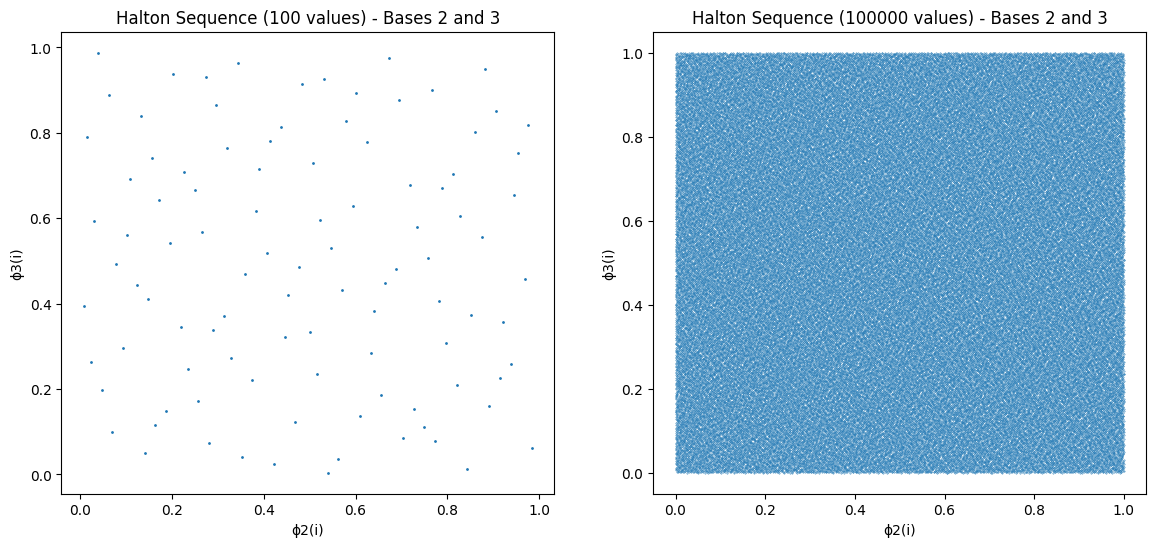

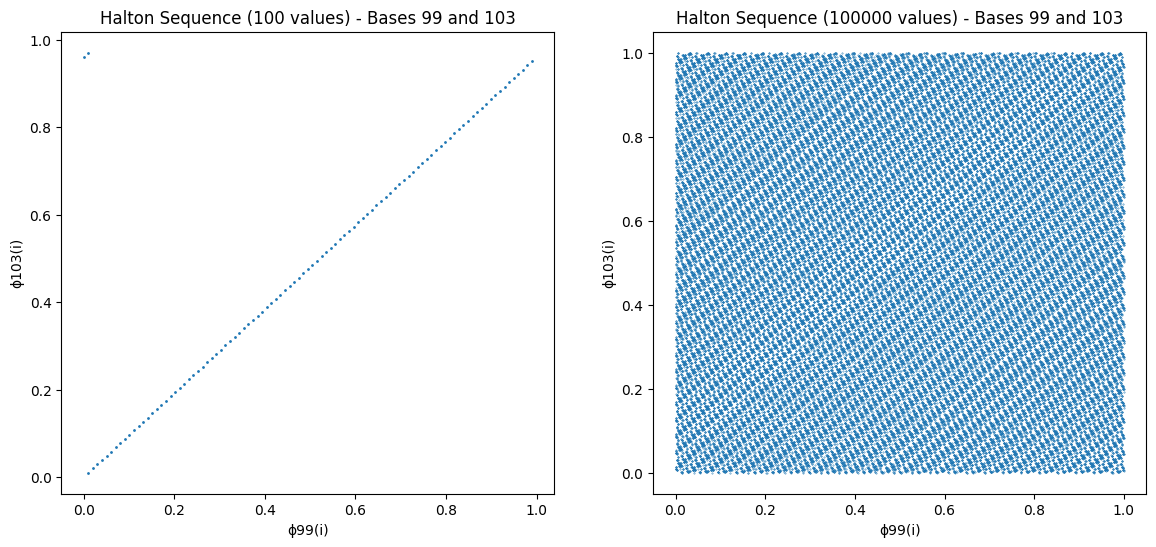

In [9]:
halton_2_3_100 = []
halton_2_3_100000 = []
halton_large_100 = []
halton_large_100000 = []

for i in range(1, 100001):
    x, f = 0, 1
    num = i
    while num > 0:
        f = f / 2
        x = x + f * (num % 2)
        num = num // 2
    phi_2 = x

    x, f = 0, 1
    num = i
    while num > 0:
        f = f / 3
        x = x + f * (num % 3)
        num = num // 3
    phi_3 = x

    if i <= 100:
        halton_2_3_100.append((phi_2, phi_3))
    halton_2_3_100000.append((phi_2, phi_3))

    x, f = 0, 1
    num = i
    while num > 0:
        f = f / 99
        x = x + f * (num % 99)
        num = num // 99
    phi_99 = x

    x, f = 0, 1
    num = i
    while num > 0:
        f = f / 103
        x = x + f * (num % 103)
        num = num // 103
    phi_103 = x

    if i <= 100:
        halton_large_100.append((phi_99, phi_103))
    halton_large_100000.append((phi_99, phi_103))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(*zip(*halton_2_3_100), s=1)
ax1.set_title("Halton Sequence (100 values) - Bases 2 and 3")
ax1.set_xlabel("ϕ2(i)")
ax1.set_ylabel("ϕ3(i)")

ax2.scatter(*zip(*halton_2_3_100000), s=0.1)
ax2.set_title("Halton Sequence (100000 values) - Bases 2 and 3")
ax2.set_xlabel("ϕ2(i)")
ax2.set_ylabel("ϕ3(i)")

plt.show()

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6))
ax3.scatter(*zip(*halton_large_100), s=1)
ax3.set_title("Halton Sequence (100 values) - Bases 99 and 103")
ax3.set_xlabel("ϕ99(i)")
ax3.set_ylabel("ϕ103(i)")

ax4.scatter(*zip(*halton_large_100000), s=0.1)
ax4.set_title("Halton Sequence (100000 values) - Bases 99 and 103")
ax4.set_xlabel("ϕ99(i)")
ax4.set_ylabel("ϕ103(i)")

plt.show()


For small bases (2 and 3), the Halton sequence achieves a uniform spread across the 2D space.
For larger bases (99 and 103), the distribution becomes less uniform, with clustering visible.
